<a href="https://colab.research.google.com/github/angelamunozc/Talento-tech/blob/main/entrenamiento/Lab_Pandas_Gemini_GOOGLE_API_KEY_Campista.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚀 Laboratorio TECH: **Pandas + IA (Gemini con `GOOGLE_API_KEY`)**

> Mañana nos espera un **Laboratorio TECH**.  
> Vamos a aprender de forma sencilla y entretenida cómo usar **Pandas** para analizar datos con **modelos de Inteligencia Artificial**.  
> Tendremos **ejemplos guiados** y también momentos para que ustedes **experimenten y guarden su propio trabajo**.  
> La idea es que al final entiendan la teoría con la práctica, salgan con algo hecho por ustedes mismos y la **motivación para seguir creando**. 💡🔥

### ¿Qué haremos?
- Crear un pequeño mundo de datos (ventas de una tiendita) y analizarlo con **pandas**.
- Usar **Gemini** (vía `google-generativeai`) con tu **`GOOGLE_API_KEY`** para:
  - redactar **insights** a partir de agregados de pandas,
  - **clasificar** opiniones de clientes,
  - co‑crear **snippets** de matplotlib.
- Todo **100% práctico**, con explicaciones paso a paso.

In [ ]:
# ===============================
# 0) Instalación de librerías
# ===============================
# pandas: análisis de datos tabulares
# matplotlib: gráficas simples
# google-generativeai: cliente oficial de Gemini (Google)
!pip -q install pandas matplotlib google-generativeai

In [ ]:
# =============================================
# 1) Configurar tu GOOGLE_API_KEY (TU TURNO)
# =============================================
# Opción A (recomendada): define tu clave como variable de entorno en Colab.
#   - Ve a tu consola o al inicio del cuaderno y escribe:
#       %env GOOGLE_API_KEY=tu_clave_aqui
#
# Opción B: pegarla de forma oculta (no quedará visible en el cuaderno):
from getpass import getpass
import os
# Descomenta la siguiente línea para pegarla cuando corras la celda:
os.environ["GOOGLE_API_KEY"] = getpass("Pega tu GOOGLE_API_KEY aquí: ")

# Validar que existe una clave antes de seguir:
#api_key = os.getenv("GOOGLE_API_KEY", "")
#assert api_key, "⚠️ Define GOOGLE_API_KEY (con %env o getpass) antes de continuar."

# Configurar cliente de Gemini
import google.generativeai as genai
genai.configure(api_key=api_key)

# Elegimos un modelo rápido para taller
MODEL_NAME = "gemini-1.5-flash"
model = genai.GenerativeModel(MODEL_NAME)

# Helper para preguntar a la IA
def ask_gemini(prompt, temperature=0.6, json_mode=False):
    """
    Envia un prompt a Gemini y devuelve el texto de la respuesta.
    Si json_mode=True, se pide explicitamente que devuelva SOLO JSON.
    """
    if json_mode:
        prompt = prompt + "\n\nDevuelve SOLO JSON valido."
    response = model.generate_content(
        prompt,
        generation_config={"temperature": float(temperature)}
    )
    return response.text

Pega tu GOOGLE_API_KEY aquí: ··········


In [ ]:
# =============================================
# 2) Generar datasets de ejemplo (TU TURNO)
# =============================================
import pandas as pd
from datetime import datetime, timedelta
import random

# TODO: fija la semilla para reproducibilidad
random.seed(10)

# TODO: define lista de productos con (Producto, Categoría, PrecioLista, Costo)
productos = [
    ("Café", "Bebidas", 1.8, 0.9),
    ("Té Negro", "Bebidas", 1.5, 0.7),
    ("Sandwich de Jamón y Queso", "Comida", 5.5, 2.5),
    ("Ensalada César", "Comida", 7.0, 3.0),
    ("Pastel de Chocolate", "Postres", 4.0, 1.8),
    ("Galleta de Avena", "Postres", 1.2, 0.5),
    ("Papas Fritas Pequeñas", "Snacks", 2.0, 1.0),
    ("Barra de Cereal", "Snacks", 1.5, 0.7)
]


# TODO: conviértelo a DataFrame y guarda a 'productos.csv'
df_prod = pd.DataFrame(productos, columns=["Producto","Categoría","PrecioLista","Costo"])
df_prod.to_csv("productos.csv", index=False)

# TODO: crea clientes C001..C050 con segmentos A/B/C y guarda 'clientes.csv'
n_clientes = 50
clientes = [(f"C{i:03d}", random.choice(["A","B","C"])) for i in range(1, n_clientes+1)]
df_cli = pd.DataFrame(clientes, columns=["ClienteID","Segmento"])
df_cli.to_csv("clientes.csv", index=False)

# TODO: genera fechas desde 2025-01-01 por 60 días
fechas = [datetime(2025, 1, 1) + timedelta(days=i) for i in range(60)]

comentarios_pool = [
    "Muy buen sabor", "Llegó un poco frío", "Excelente, me encantó",
    "Precio justo", "Demoró en llegar", "Atención amable",
    "Porciones pequeñas", "Sabor consistente", "Recomendado",
    "No estuvo tan fresco", "Me sorprendió", "Volveré a comprar", None, None
]

rows = []
for f in fechas:
    for _ in range(random.randint(8, 16)):
        # completa aquí la lógica (elige producto/cliente/hora, simula nulos, etc.)
        producto = random.choice(productos)
        cliente = random.choice(clientes)
        hora = random.randint(8, 20)
        fecha_hora = f.replace(hour=hora, minute=random.randint(0, 59), second=random.randint(0, 59))
        cantidad = random.randint(1, 5)
        precio = round(producto[2] * random.uniform(0.9, 1.1), 1) # Simula precio variable
        comentario = random.choice(comentarios_pool)
        rows.append({
            "FechaHora": fecha_hora,
            "ClienteID": cliente[0],
            "Producto": producto[0],
            "Categoría": producto[1],
            "Precio": precio,
            "Cantidad": cantidad,
            "Comentario_cliente": comentario
        })


df = pd.DataFrame(rows)
df.to_csv("ventas.csv", index=False)
print("Archivos generados: ventas.csv, productos.csv, clientes.csv (filas ventas:", len(df), ")")
df.head()

Archivos generados: ventas.csv, productos.csv, clientes.csv (filas ventas: 708 )


,FechaHora,ClienteID,Producto,Categoría,Precio,Cantidad,Comentario_cliente
0,2025-01-01 18:35:28,C021,Ensalada César,Comida,7.0,4,Me sorprendió
1,2025-01-01 10:53:14,C033,Galleta de Avena,Postres,1.1,4,Muy buen sabor
2,2025-01-01 17:42:04,C020,Barra de Cereal,Snacks,1.6,5,Llegó un poco frío
3,2025-01-01 17:23:58,C025,Sandwich de Jamón y Queso,Comida,5.1,5,None
4,2025-01-01 10:51:12,C029,Té Negro,Bebidas,1.5,3,Porciones pequeñas


In [ ]:
# =============================================
# 3) Cargar y explorar (TU TURNO)
# =============================================
import pandas as pd
df = pd.read_csv("ventas.csv")
df_prod = pd.read_csv("productos.csv")
df_cli = pd.read_csv("clientes.csv")
df["FechaHora"] = pd.to_datetime(df["FechaHora"])
df.info()
display(df.describe(include="all"))
df.isna().sum()
df["Categoría"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   FechaHora           708 non-null    datetime64[ns]
 1   ClienteID           708 non-null    object        
 2   Producto            708 non-null    object        
 3   Categoría           708 non-null    object        
 4   Precio              708 non-null    float64       
 5   Cantidad            708 non-null    int64         
 6   Comentario_cliente  598 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 38.8+ KB


,FechaHora,ClienteID,Producto,Categoría,Precio,Cantidad,Comentario_cliente
count,708,708,708,708,708.000000,708.000000,598
unique,NaN,50,8,4,NaN,NaN,12
top,NaN,C020,Pastel de Chocolate,Postres,NaN,NaN,Recomendado
freq,NaN,21,99,193,NaN,NaN,59
mean,2025-01-31 05:46:09.574858752,NaN,NaN,NaN,3.025141,3.025424,NaN
min,2025-01-01 09:16:28,NaN,NaN,NaN,1.100000,1.000000,NaN
25%,2025-01-16 20:14:10.249999872,NaN,NaN,NaN,1.500000,2.000000,NaN
50%,2025-01-30 13:45:08,NaN,NaN,NaN,1.900000,3.000000,NaN
75%,2025-02-15 08:19:23.249999872,NaN,NaN,NaN,4.300000,4.000000,NaN
max,2025-03-01 19:06:12,NaN,NaN,NaN,7.700000,5.000000,NaN


,count
Categoría,
Postres,193
Snacks,185
Comida,165
Bebidas,165


In [ ]:
# =============================================
# 4) Limpieza + Features (TU TURNO)
# =============================================
df = df.dropna(subset=["Precio","Cantidad"]).copy()
df["Total"] = df["Precio"] * df["Cantidad"]
df["Dia"] = df["FechaHora"].dt.date.astype(str)
df["Hora"] = df["FechaHora"].dt.hour
df["Semana"] = df["FechaHora"].dt.isocalendar().week
df.head()

,FechaHora,ClienteID,Producto,Categoría,Precio,Cantidad,Comentario_cliente,Total,Dia,Hora,Semana
0,2025-01-01 18:35:28,C021,Ensalada César,Comida,7.0,4,Me sorprendió,28.0,2025-01-01,18,1
1,2025-01-01 10:53:14,C033,Galleta de Avena,Postres,1.1,4,Muy buen sabor,4.4,2025-01-01,10,1
2,2025-01-01 17:42:04,C020,Barra de Cereal,Snacks,1.6,5,Llegó un poco frío,8.0,2025-01-01,17,1
3,2025-01-01 17:23:58,C025,Sandwich de Jamón y Queso,Comida,5.1,5,NaN,25.5,2025-01-01,17,1
4,2025-01-01 10:51:12,C029,Té Negro,Bebidas,1.5,3,Porciones pequeñas,4.5,2025-01-01,10,1


In [ ]:
# =============================================
# 5) GroupBy esenciales (TU TURNO)
# =============================================
ingresos_cat = df.groupby("Categoría")["Total"].sum().sort_values(ascending=False)
ingresos_prod = df.groupby("Producto")["Total"].sum().sort_values(ascending=False)
top5_u = df.groupby("Producto")["Cantidad"].sum().sort_values(ascending=False).head(5)
ingresos_cat, ingresos_prod.head(), top5_u

(Categoría
 Comida     2896.5
 Postres    1609.2
 Snacks     1014.3
 Bebidas     823.6
 Name: Total, dtype: float64,
 Producto
 Ensalada César               1677.0
 Pastel de Chocolate          1250.2
 Sandwich de Jamón y Queso    1219.5
 Papas Fritas Pequeñas         571.7
 Café                          468.3
 Name: Total, dtype: float64,
 Producto
 Pastel de Chocolate      311
 Galleta de Avena         296
 Barra de Cereal          292
 Papas Fritas Pequeñas    288
 Café                     258
 Name: Cantidad, dtype: int64)

In [ ]:
# =============================================
# 6) Pivot & Resample (TU TURNO)
# =============================================
tabla = pd.pivot_table(df, index="Semana", columns="Categoría", values="Total", aggfunc="sum")
diario = df.set_index("FechaHora")["Total"].resample("D").sum()
tabla.head(), diario.head()

(Categoría  Bebidas  Comida  Postres  Snacks
 Semana                                     
 1             26.6   178.1    139.4   123.7
 2            111.6   430.2    137.3   101.9
 3            106.6   307.1    192.3   127.3
 4            123.7   294.7    216.5   146.9
 5            100.9   420.7    131.3   119.2,
 FechaHora
 2025-01-01    112.8
 2025-01-02    102.6
 2025-01-03     86.8
 2025-01-04    118.5
 2025-01-05     47.1
 Freq: D, Name: Total, dtype: float64)

In [ ]:
# =============================================
# 7) Joins (TU TURNO)   SE USA PARA UNIR Y BUSCAR ALGO EN OTRA TABLA, LO BUSCA Y LO TRAE A ESA NUEVA TABLA CREADA
# =============================================
dfm = df.merge(df_prod, on="Producto", how="left")
dfm["MargenUnitario"] = dfm["Precio"] - dfm["Costo"]
dfm["Margen"] = dfm["MargenUnitario"] * dfm["Cantidad"]
dfm = dfm.merge(df_cli, on="ClienteID", how="left")
dfm.head()

,FechaHora,ClienteID,Producto,Categoría_x,Precio,Cantidad,Comentario_cliente,Total,Dia,Hora,Semana,Categoría_y,PrecioLista,Costo,MargenUnitario,Margen,Segmento
0,2025-01-01 18:35:28,C021,Ensalada César,Comida,7.0,4,Me sorprendió,28.0,2025-01-01,18,1,Comida,7.0,3.0,4.0,16.0,A
1,2025-01-01 10:53:14,C033,Galleta de Avena,Postres,1.1,4,Muy buen sabor,4.4,2025-01-01,10,1,Postres,1.2,0.5,0.6,2.4,C
2,2025-01-01 17:42:04,C020,Barra de Cereal,Snacks,1.6,5,Llegó un poco frío,8.0,2025-01-01,17,1,Snacks,1.5,0.7,0.9,4.5,B
3,2025-01-01 17:23:58,C025,Sandwich de Jamón y Queso,Comida,5.1,5,NaN,25.5,2025-01-01,17,1,Comida,5.5,2.5,2.6,13.0,B
4,2025-01-01 10:51:12,C029,Té Negro,Bebidas,1.5,3,Porciones pequeñas,4.5,2025-01-01,10,1,Bebidas,1.5,0.7,0.8,2.4,C


In [ ]:
# =============================================
# 8) Ranking & Ventanas (TU TURNO)
# =============================================
res = df.groupby(["Categoría","Producto"])["Total"].sum().reset_index()
res["RankCat"] = res.groupby("Categoría")["Total"].rank(ascending=False, method="dense")
res.sort_values(["Categoría","RankCat","Total"], inplace=True)
res.head(10)
diario = df.set_index("FechaHora")["Total"].resample("D").sum()
mm7 = diario.rolling(7).mean()

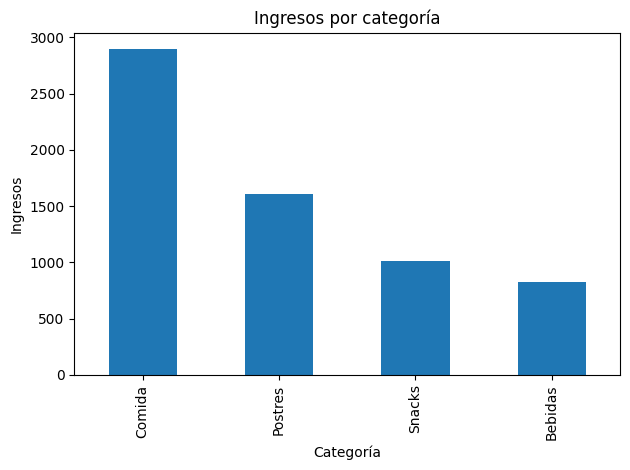

In [ ]:
# =============================================
# 9) Gráfica única (TU TURNO)
# =============================================
import matplotlib.pyplot as plt
serie = df.groupby("Categoría")["Total"].sum().sort_values(ascending=False)     #SE USA OARA AGRUPAR TODAS LAS VENTAS DE ESA CATEGORIA--COMPARA SI EL INDICADDOR ES EL MISMO Y SIS ES ASI,, AGRUPARLOS
plt.figure()
serie.plot(kind="bar")
plt.title("Ingresos por categoría")
plt.xlabel("Categoría")
plt.ylabel("Ingresos")
plt.tight_layout()
plt.show()

In [ ]:
# =============================================
# 10) IA — Insights desde pandas (TU TURNO)
# =============================================
resumen_cat = df.groupby("Categoría")["Total"].sum().sort_values(ascending=False)
texto = resumen_cat.to_string()
prompt = f"""
Actúa como analista. Con estos datos agregados:
- Escribe 3 insights accionables (con verbo)
- Propón 2 hipótesis a validar
- Sugiere 2 visualizaciones simples (y por qué)
DATOS:
{texto}
"""
print(ask_gemini(prompt, temperature=0.5))

## Análisis de Datos de Ventas: Comida, Postres, Snacks y Bebidas

**Insights Accionables:**

1. **Priorizar el marketing y la innovación en la categoría "Comida":**  Dado que la categoría "Comida" representa el 45% de las ventas totales (2896.5 / (2896.5 + 1609.2 + 1014.3 + 823.6) ≈ 0.45), se debe invertir en estrategias para maximizar su potencial. Esto podría incluir el desarrollo de nuevos platos, promociones especiales o la mejora de la experiencia del cliente en esta área.

2. **Explorar el potencial de "Postres" con promociones complementarias:** La categoría "Postres" representa un significativo 25% de las ventas.  Se debería explorar la posibilidad de promociones conjuntas con otras categorías, especialmente "Comida", para impulsar las ventas de ambos.  Por ejemplo, ofrecer descuentos en postres al comprar un plato principal.

3. **Optimizar el margen de beneficio de "Snacks" y "Bebidas":**  Las categorías "Snacks" y "Bebidas" representan un porcentaje menor de las ventas (16%

In [ ]:
# =============================================
# 11) IA — Clasificar comentarios (TU TURNO, salida JSON)
# =============================================
comentarios = "\n".join(df["Comentario_cliente"].dropna().tolist())
prompt = f"""
Clasifica cada comentario en positivo, negativo o neutral.
Devuelve SOLO JSON con claves 'positivo', 'negativo', 'neutral' y listas de comentarios.

COMENTARIOS:
{comentarios}
"""
salida = ask_gemini(prompt, temperature=0.3, json_mode=True)
print(salida)
import json

# Find the start and end of the JSON object
json_start = salida.find('{')
json_end = salida.rfind('}')

if json_start != -1 and json_end != -1:
    json_string = salida[json_start : json_end + 1]
    try:
        data = json.loads(json_string)
        print("Keys in the loaded JSON:", list(data.keys()))
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON after extraction: {e}")
        print("Extracted string:", json_string)
else:
    print("Could not find JSON object in the output.")
    print("Full output:", salida)

```json
{
  "positivo": [
    "Muy buen sabor",
    "Sabor consistente",
    "Atención amable",
    "Excelente, me encantó",
    "Excelente, me encantó",
    "Excelente, me encantó",
    "Precio justo",
    "Sabor consistente",
    "Precio justo",
    "Recomendado",
    "Atención amable",
    "Atención amable",
    "Excelente, me encantó",
    "Precio justo",
    "Excelente, me encantó",
    "Atención amable",
    "Volveré a comprar",
    "Volveré a comprar",
    "Recomendado",
    "Me sorprendió",
    "Recomendado",
    "Precio justo",
    "Volveré a comprar",
    "Volveré a comprar",
    "Me sorprendió",
    "Recomendado",
    "Precio justo",
    "Atención amable",
    "Me sorprendió",
    "Volveré a comprar",
    "Atención amable",
    "Sabor consistente",
    "Atención amable",
    "Volveré a comprar",
    "Volveré a comprar",
    "Volveré a comprar",
    "Recomendado",
    "Sabor consistente",
    "Me sorprendió",
    "Sabor consistente",
    "Recomendado",
    "Sabor consistente"

In [ ]:
# =============================================
# 12) IA — Copiloto de código Matplotlib (TU TURNO)
# =============================================
contexto = "Quiero graficar mi serie 'serie' de ingresos por categoría."
prompt = f"""
Con este contexto: {contexto}
Devuélveme SOLO un snippet de Python listo para pegar en Colab que:
- Use matplotlib
- Una sola figura
- Sin estilos ni colores personalizados
- Con título, ejes y 'tight_layout()'
"""
print(ask_gemini(prompt))

```python
import matplotlib.pyplot as plt

plt.figure()
plt.plot(serie)
plt.title('Ingresos por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Ingresos')
plt.tight_layout()
plt.show()
```



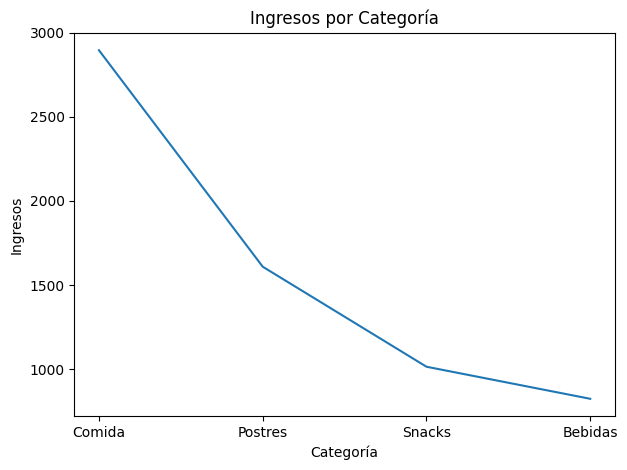

In [ ]:
plt.figure()
plt.plot(serie)
plt.title('Ingresos por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Ingresos')
plt.tight_layout()
plt.show()

## 13) Retos creativos (opcionales)
1) **Outliers (IQR)**: detecta días anómalos de ingreso.  
2) **Cohortes simples**: primer mes de compra por cliente y gasto total.  
3) **Franjas horarias**: Mañana/Tarde/Noche y top categoría por franja.

Días con ingresos anómalos (Outliers):
Series([], Name: Total, dtype: float64)


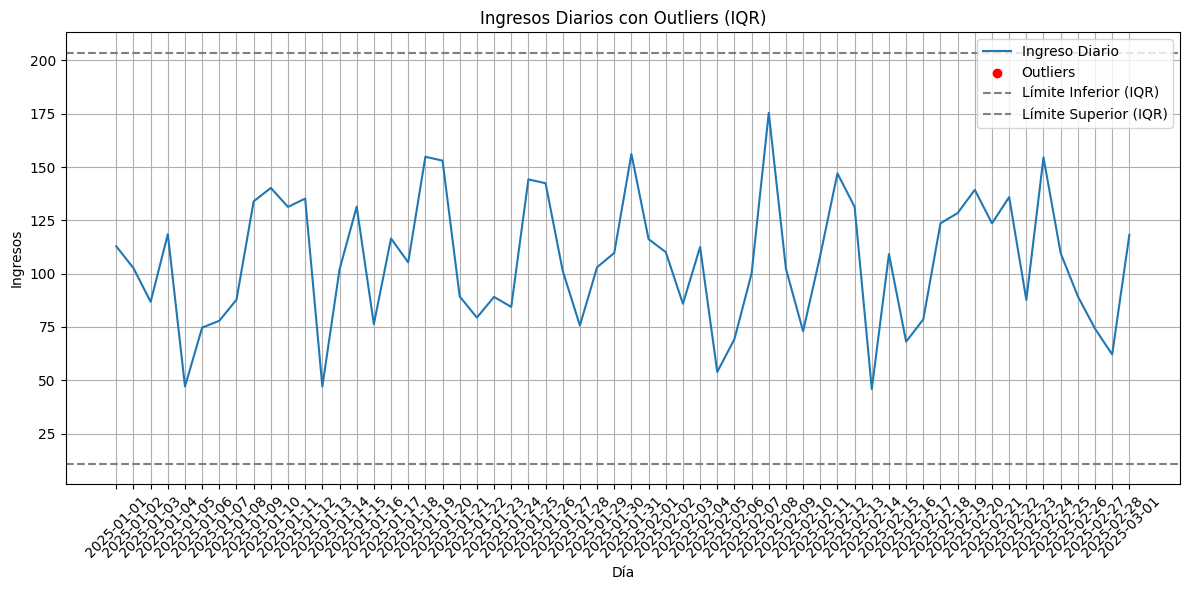

Primer mes de compra y gasto total por cliente:


,PrimerMesCompra,GastoTotal
ClienteID,,
C001,2025-01,143.7
C002,2025-01,89.9
C003,2025-01,135.4
C004,2025-01,87.3
C005,2025-01,112.5


from matplotlib import pyplot as plt
_df_0['GastoTotal'].plot(kind='hist', bins=20, title='GastoTotal')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('ClienteID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['GastoTotal'].plot(kind='line', figsize=(8, 4), title='GastoTotal')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['ClienteID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='GastoTotal', y='ClienteID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# =============================================
# 13) Retos creativos (opcionales) - Franjas horarias
# =============================================
# 3. Franjas horarias: Mañana/Tarde/Noche y top categoría por franja.

# Definir las franjas horarias
def categorizar_hora(hora):
    if 6 <= hora < 12:
        return "Mañana"
    elif 12 <= hora < 18:
        return "Tarde"
    else:
        return "Noche"

# Aplicar la categorización al DataFrame
df["FranjaHoraria"] = df["Hora"].apply(categorizar_hora)

# Calcular el ingreso total por franja horaria y categoría
ingresos_por_franja_categoria = df.groupby(["FranjaHoraria", "Categoría"])["Total"].sum().reset_index()

# Encontrar la categoría con mayores ingresos en cada franja horaria
top_categoria_por_franja = ingresos_por_franja_categoria.loc[ingresos_por_franja_categoria.groupby("FranjaHoraria")["Total"].idxmax()]

print("Ingresos totales por franja horaria y categoría:")
display(ingresos_por_franja_categoria)

print("\nTop categoría por franja horaria:")
display(top_categoria_por_franja)

Ingresos totales por franja horaria y categoría:


,FranjaHoraria,Categoría,Total
0,Mañana,Bebidas,286.3
1,Mañana,Comida,902.5
2,Mañana,Postres,440.2
3,Mañana,Snacks,251.1
4,Noche,Bebidas,142.9
5,Noche,Comida,595.6
6,Noche,Postres,230.4
7,Noche,Snacks,256.6
8,Tarde,Bebidas,394.4
9,Tarde,Comida,1398.4



Top categoría por franja horaria:


,FranjaHoraria,Categoría,Total
1,Mañana,Comida,902.5
5,Noche,Comida,595.6
9,Tarde,Comida,1398.4


/tmp/ipython-input-3807970197.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ingresos_por_franja_categoria, x='Total', y='FranjaHoraria', inner='stick', palette='Dark2')


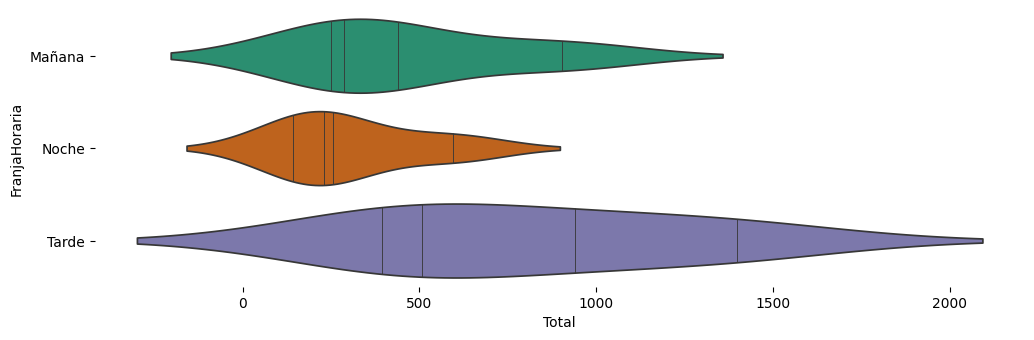

In [ ]:
# @title FranjaHoraria vs Total

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(ingresos_por_franja_categoria['FranjaHoraria'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(ingresos_por_franja_categoria, x='Total', y='FranjaHoraria', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## 14) Cierre
- Un hallazgo con `groupby`/`pivot` y por qué importa.  
- Qué limpiaste y por qué fue razonable.  
- Una idea propuesta por la IA que valga la pena testear.